In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
import seaborn as sns


In [5]:
cars=pd.read_csv('Automobile.csv')

In [6]:
cars.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,168,168
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
number_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [7]:
cars.dtypes

symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object

In [8]:
cars=cars.drop('normalized_losses',axis=1)
cars=cars.drop('fuel_type',axis=1)
cars=cars.drop('body_style',axis=1)
cars=cars.drop('number_of_doors',axis=1)
cars=cars.drop('drive_wheels',axis=1)
cars=cars.drop('aspiration',axis=1)
cars=cars.drop('engine_location',axis=1)
cars=cars.drop("curb_weight",axis=1)
cars=cars.drop('symboling',axis=1)

In [9]:
# cars=cars.drop("engine_type",axis=1)
cars=cars.drop("make",axis=1)

cars.dtypes


wheel_base             float64
length                 float64
width                  float64
height                 float64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object

In [10]:
#here no of cylinder are object so we convet them into int
cars["number_of_cylinders"]=cars["number_of_cylinders"].replace({"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"twelve":12})
cars["number_of_cylinders"]=cars["number_of_cylinders"].astype("float64")


In [11]:
cars=cars.replace("?",np.nan)
cars["horsepower"]=cars["horsepower"].astype("float64")
cars["price"]=cars["price"].astype("float64")
cars["peak_rpm"]=cars["peak_rpm"].astype("float64")
cars["engine_size"]=cars["engine_size"].astype("int64")
cars=cars.drop("fuel_system",axis=1)



#fill all the NaN in numeric columns with medium values of those columns respectively


In [12]:

cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wheel_base,201.0,98.797015,6.066366,86.60,94.50,97.00,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.20,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.50,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.10,55.50,59.80
number_of_cylinders,201.0,4.363184,1.059452,2.00,4.00,4.00,4.00,12.00
engine_size,201.0,126.875622,41.546834,61.00,98.00,120.00,141.00,326.00
bore,201.0,3.329701,0.268166,2.54,3.15,3.31,3.58,3.94
stroke,201.0,3.261741,0.317875,2.07,3.11,3.29,3.46,4.17
compression_ratio,201.0,10.164279,4.004965,7.00,8.60,9.00,9.40,23.00
horsepower,201.0,103.263682,37.389372,48.00,70.00,95.00,116.00,262.00


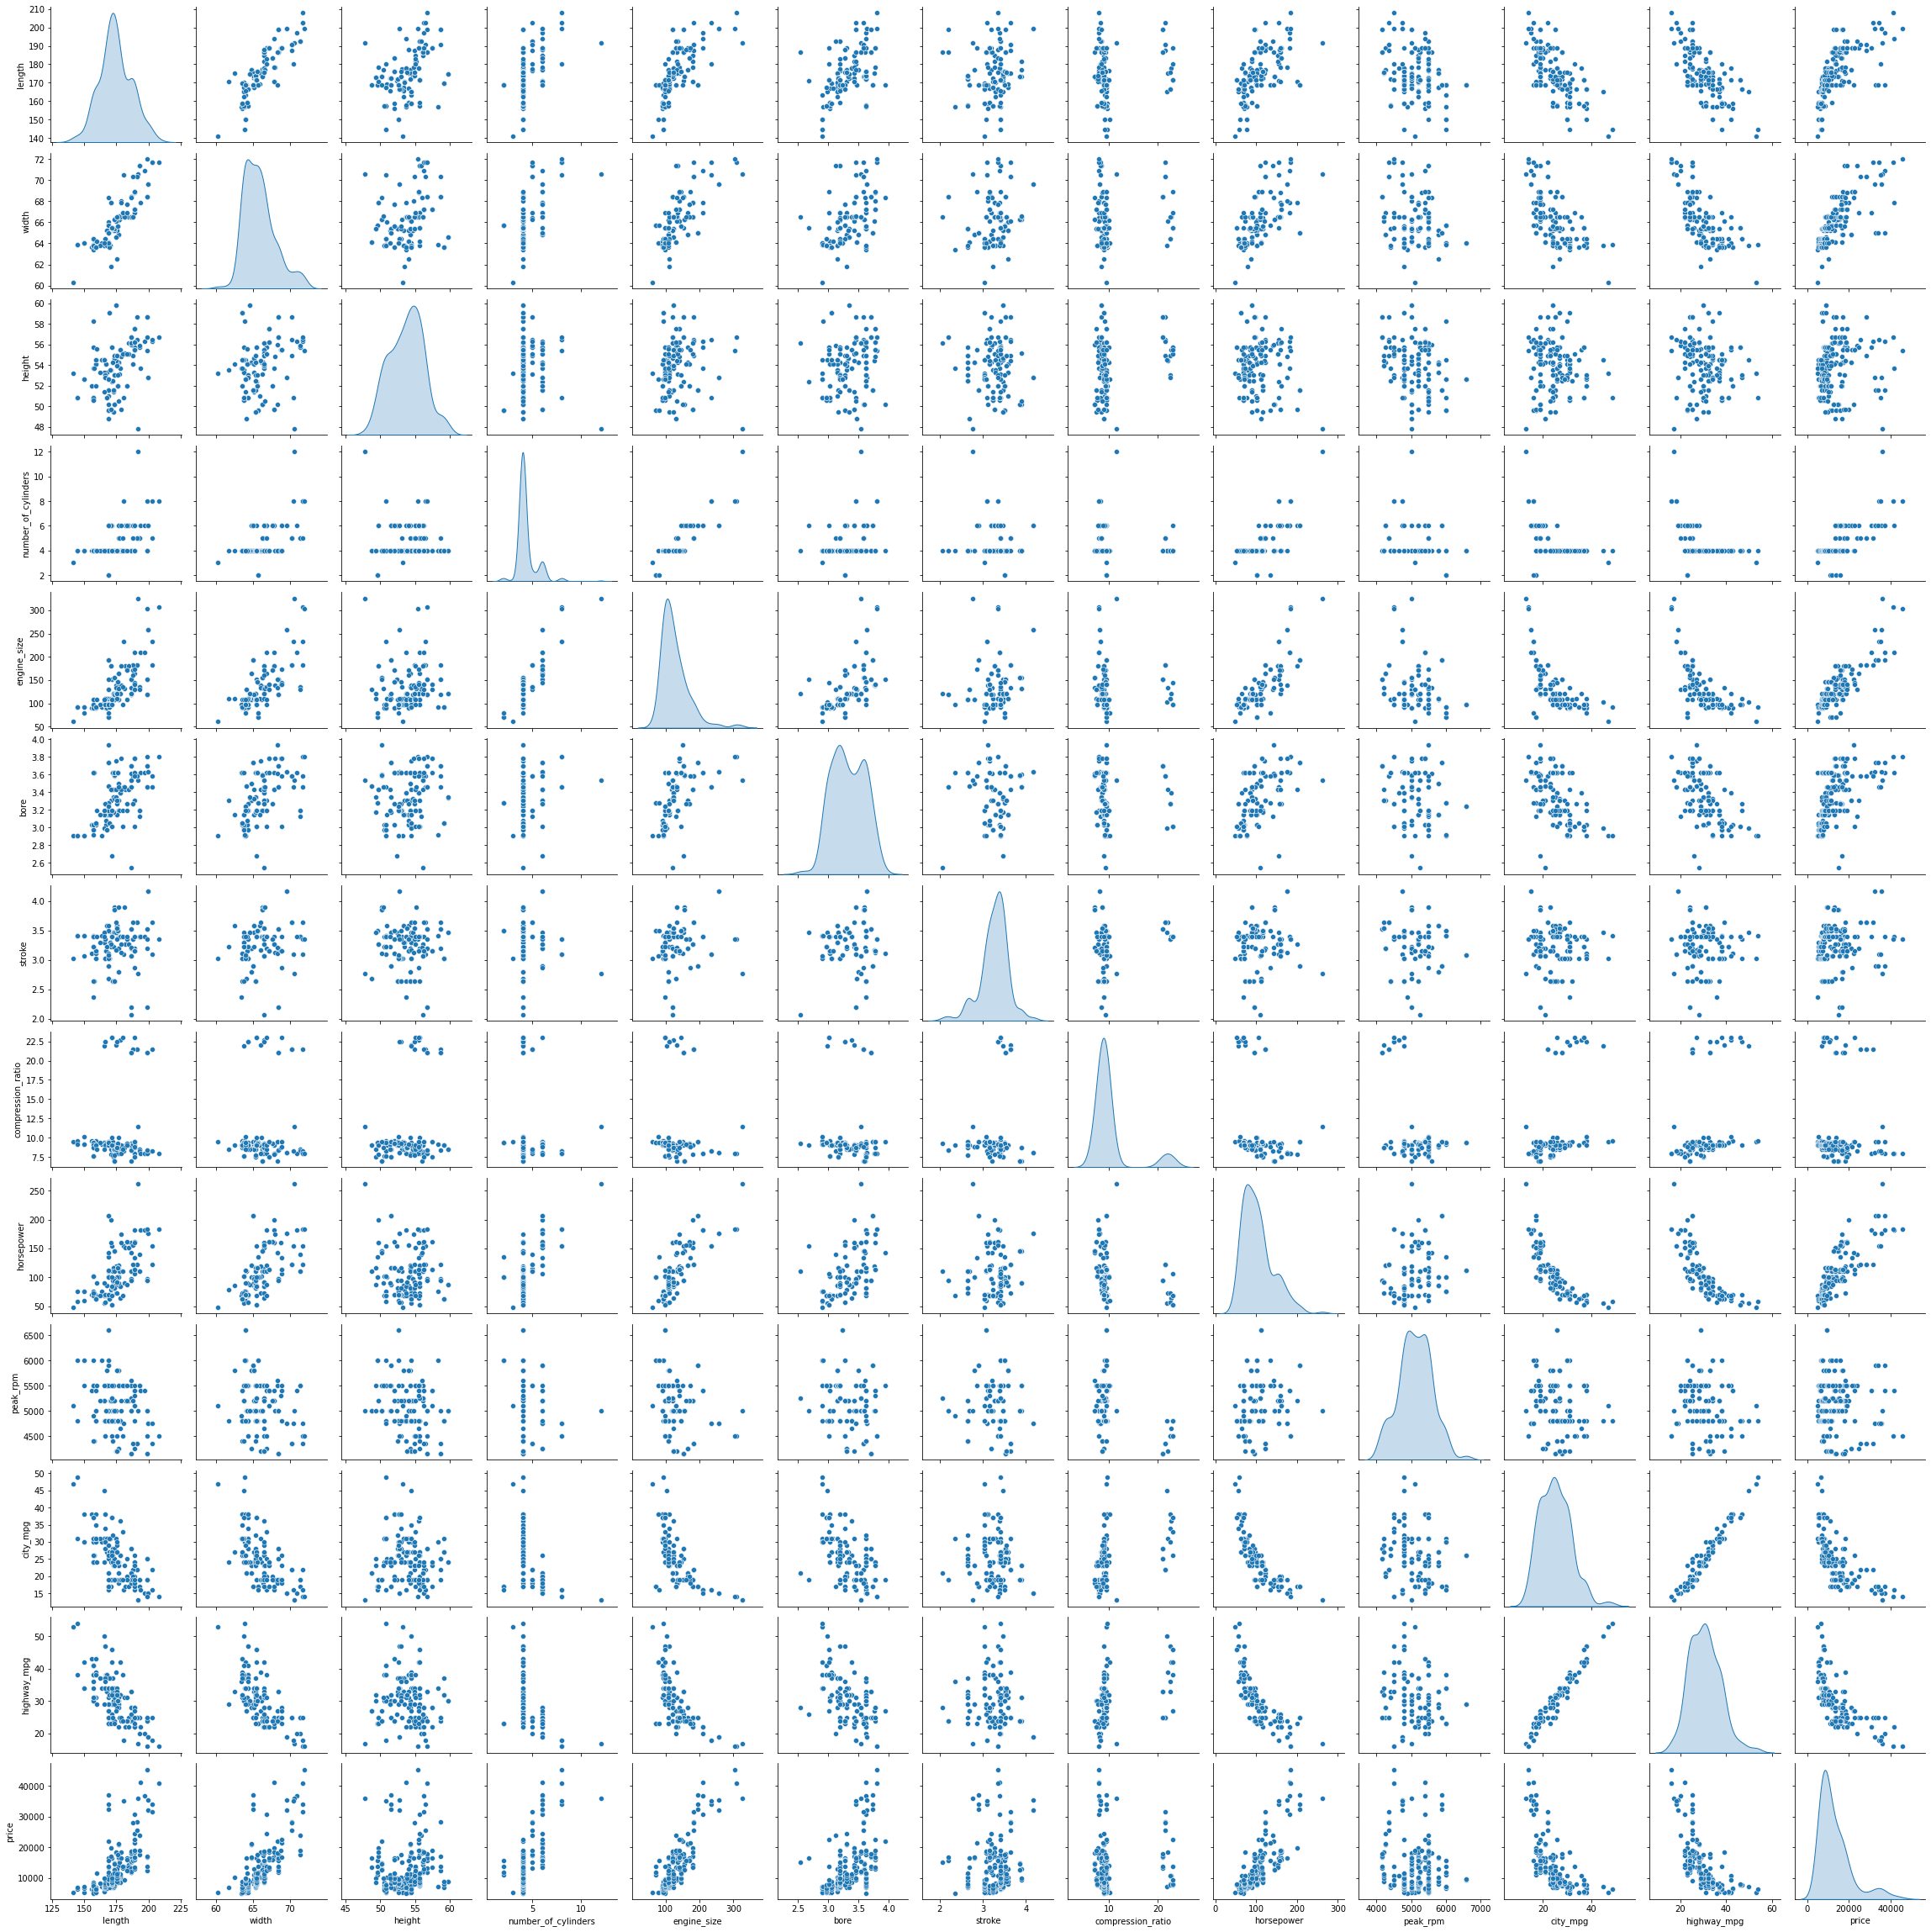

In [13]:
cars_attr=cars.iloc[:,1:16]
sns.pairplot(cars_attr,diag_kind="kde")

In [14]:
cars=cars.drop("engine_type",axis=1)
x=cars.drop("price",axis=1)
y=cars[["price"]]


In [15]:
cars.dtypes

wheel_base             float64
length                 float64
width                  float64
height                 float64
number_of_cylinders    float64
engine_size              int64
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower             float64
peak_rpm               float64
city_mpg                 int64
highway_mpg              int64
price                  float64
dtype: object

In [29]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
regression_model=lr()
regression_model.fit(x_train,y_train)

LinearRegression()

In [19]:
#lets explore the coefficient for each of the independent attributes
for idx,col_name in enumerate(x_train.columns):
    print("the coefficient for "+ col_name+ " is", regression_model.coef_[0][idx])

the coefficient for wheel_base is 121.61270276846055
the coefficient for length is -121.6609366936839
the coefficient for width is 576.1239589980534
the coefficient for height is 230.23841595001915
the coefficient for number_of_cylinders is -2429.323599568494
the coefficient for engine_size is 198.43113639352117
the coefficient for bore is -3979.6464408284155
the coefficient for stroke is -4733.7685244778395
the coefficient for compression_ratio is 305.80212782710026
the coefficient for horsepower is 36.66792346323247
the coefficient for peak_rpm is 2.3500419300348057
the coefficient for city_mpg is -485.6374542220333
the coefficient for highway_mpg is 296.56015008141105


In [20]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -29668.292136975993


In [21]:
regression_model.score(x_test,y_test)

0.806938442422216

# how can the model perfomance be improved?
1.always address outliers b/c your first model will always impacted by outliers

2. we noticed that on many attributes ,there was a clump of data points on        lower values and scattered on high values

3. that is indication of mixing data from two segments. Maybe if we segregate the data we will get better result

4. not all attributes show a linear relation to price. Convert these attributes    to quadratic from give a better fit on linear model

In [22]:
import statsmodels.formula.api as smf

In [23]:
cars=pd.concat([y_train,x_train],axis=1)

In [24]:
cars.head()

,price,wheel_base,length,width,height,number_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
195,18950.0,104.3,188.8,67.2,57.5,4.0,130,3.62,3.15,7.5,162.0,5100.0,17,22
73,5389.0,93.7,157.3,64.4,50.8,4.0,92,2.97,3.23,9.4,68.0,5500.0,37,41
173,11248.0,102.4,175.6,66.5,53.9,4.0,122,3.31,3.54,8.7,92.0,4200.0,27,32
53,11845.0,95.3,169.0,65.7,49.6,2.0,70,3.28,3.50,9.4,101.0,6000.0,17,23
33,7129.0,93.7,150.0,64.0,52.6,4.0,92,2.91,3.41,9.2,76.0,6000.0,30,34


In [26]:
lmcrs=smf.ols(formula='price~wheel_base+length+width+height+number_of_cylinders+engine_size+bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg',data=cars).fit()

In [27]:
lmcrs.params

Intercept             -29668.292137
wheel_base               121.612703
length                  -121.660937
width                    576.123959
height                   230.238416
number_of_cylinders    -2429.323600
engine_size              198.431136
bore                   -3979.646441
stroke                 -4733.768524
compression_ratio        305.802128
horsepower                36.667923
peak_rpm                   2.350042
city_mpg                -485.637454
highway_mpg              296.560150
dtype: float64

In [28]:
print(lmcrs.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     64.63
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           1.48e-51
Time:                        20:37:02   Log-Likelihood:                -1415.2
No. Observations:                 150   AIC:                             2858.
Df Residuals:                     136   BIC:                             2901.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.967e+04   1